# Задание по кластеризации

Попробуем реализовать эвристику выбора центроидов:
* запустим несколько раз алгоритм, запомним, куда попали центроиды при каждом запуске
* усредним координаты за все несколько запуска.

Попробуйте применить эту эвристику на практике: 

* используйте 10 запусков алгоритма $k$-средних для $k=2$ с параметрами
<pre>
kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
</pre>
* в каждом запуске сохраняйте координаты центроидов общий массив $c$, см. `cluster_centers_ : array, [n_clusters, n_features]`
* визуализируйте координаты точек из $c$ на фоне исходного множества точек

Результат будет примерно такой:
![several_init_knn](img/several_init_knn.png)

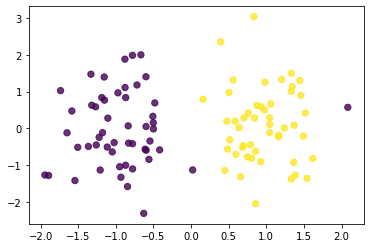

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

with open('data/clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, marker='o', alpha=0.8, label='data')
plt.show()

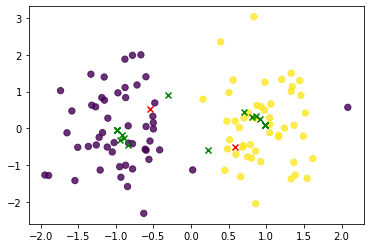

In [2]:
# -- ВАШ КОД ТУТ --
from sklearn.cluster import KMeans

all_centers = []


def find_centers(all_points):
    results = []
    for local_centers in list(zip(*all_points)):
        local_centers = np.array(local_centers)
        results.append(np.average(local_centers, axis=1))
        
    return np.array(results)


for _ in range(10):
    kmeans_model = KMeans(
        n_clusters=2,
        n_init=1,
        random_state=None,
        algorithm='full',
        max_iter=2,
    )
    
    kmeans_model = kmeans_model.fit(X)
    
    all_centers.append(kmeans_model.cluster_centers_)

    
best_centers = find_centers(all_centers)

centers = np.vstack(all_centers)



plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, marker='o', alpha=0.8, label='data')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='green')
plt.scatter(best_centers[:, 0], best_centers[:, 1], marker='x', color='red')
plt.show()

# ------------------

### Задача 2

посчитать сумму внутрикластерных расстояний от каждой точки до центроида

**Внимание**: циклы использовать запрещено, воспользоваться функциями `numpy`

In [3]:
import numpy as np

clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

# -- ВАШ КОД ТУТ --


spacing = np.sqrt(np.sum((clust-centroid)**2,axis=1))

intra_cluster_distance = np.sum(spacing)

# ------------------

Тестируем корректность вычислений

In [4]:
import unittest

class TestNotebook(unittest.TestCase):
    def test_task(self):
        self.assertAlmostEqual(intra_cluster_distance, 11.44058, places=5)

unittest.main(argv=[''], verbosity=2, exit=False)

test_task (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


**Задача на DBSCAN**

Обучите модель DBSCAN с параметром `min_samples=8` и `eps=0.6`

Визуализируйте результат.

Сравните внутрикластерное расстояние со случаем `min_samples = 3`. Стало лучше или хуже?

In [5]:
import numpy as np

from scipy.spatial import distance

from sklearn import metrics
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.cluster import DBSCAN

Silhouette Coefficient: 0.412


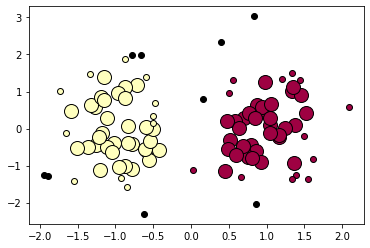

In [6]:
# ---- ВАШ КОД ТУТ -----

# Min Samples = 8
db = DBSCAN(eps=0.6, min_samples=8).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each)
    for each in np.linspace(0, 1, len(unique_labels))
]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.show()

# ----------------------

Silhouette Coefficient: 0.441


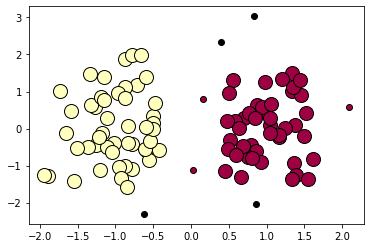

In [7]:
# Min Samples = 3

db = DBSCAN(eps=0.6, min_samples=3).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each)
    for each in np.linspace(0, 1, len(unique_labels))
]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.show()

#### Задача на метрики кластеризации

Обучите *k-means* из модуля sklearn для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта в сравнении со случаем $k=2$? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше мо метрике AMI?

In [18]:
from sklearn.metrics import *
with open('data/clustering.pkl', 'rb') as f:
    data = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

# k = 4
model = KMeans(n_clusters=4).fit(X)

score_sil = silhouette_score(X, model.labels_)
score_ami = adjusted_mutual_info_score(Y, model.labels_)

print("Качество кластеризации по метрике силуэтта при к=4 %.3f" % score_sil)
print("Качество кластеризации по метрике AMI при к=4 %.3f" % score_ami)

# k = 2
model = KMeans(n_clusters=2).fit(X)

score_sil = silhouette_score(X, model.labels_)
score_ami = adjusted_mutual_info_score(Y, model.labels_)

print("Качество кластеризации по метрике силуэтта при к=2 %.3f" % score_sil)
print("Качество кластеризации по метрике AMI при к=2 %.3f" % score_ami)

print('Наилучший результат метрик был достигнут при количестве кластеров равном двум ')

Качество кластеризации по метрике силуэтта при к=4 0.439
Качество кластеризации по метрике AMI при к=4 0.435
Качество кластеризации по метрике силуэтта при к=2 0.447
Качество кластеризации по метрике AMI при к=2 0.928
Наилучший результат метрик был достигнут приколичестве кластеров равном двум 


/srv/data_client/.venv/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/srv/data_client/.venv/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


### Домашнее задание по PCA

В домашней работе предлагается применить PCA трехмерным данным по оттоку, которые содержатся в файле `data/client_segmentation.csv`. В файле содержится информация по клиентам оператора связи о том, как изменилось потребление услуг оператора за два месяца:
* call_diff доля звонков
* sms_diff доля смс
* доля интернет-трафика traffic_diff'

Все показатели вычисляются по формуле

$$
\frac{\text{new_value}-\text{old_value}}{\text{old_value}}
$$

В последней колонке customes_class содержится метка по оттоку:
* $0$ - активный пользователя
* $1$ - "спящий" пользователь (редко пользуется услугами)
* $2$ - пользователь, который ушел в отток

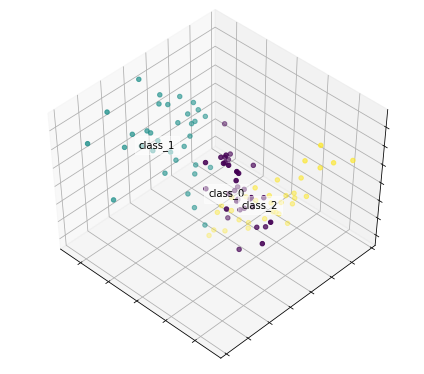

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

df_source = pd.read_csv('data/client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values
# и визуализируем их
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134); plt.cla()
num_labels = np.unique(y).size
for name, label in [('class_%d' % i, i) for i in range(num_labels)]:
    ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean() + 0.5,
        X[y == label, 2].mean(), name, horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.w_xaxis.set_ticklabels([]); ax.w_yaxis.set_ticklabels([]); ax.w_zaxis.set_ticklabels([])
plt.show()

С помощью класса `sklearn.decomposition.PCA` выполните понижение размерности признакового пространства  с $n=3$ до $n=2$ и снова визуализируйте данные. Картинка должна получится примерно такая:
![classification_dim_reduction](img/classification_dim_reduction.png)

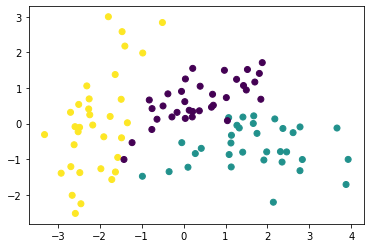

In [34]:
from sklearn.decomposition import PCA

transformed_X = PCA(n_components=2, random_state=None).fit_transform(X, y)

plt.scatter(transformed_X[:, 0], transformed_X[:, 1], c=y)
plt.show()

#### Домашнее задание по SVD

В домашней работе предлагаю Вам немного поработать с изображениями (похожий трюк можно увидеть в этой [статье на хабре](https://habr.com/ru/post/275273/)). Для этого нужно установить модуль Pillow (если у вас Анаконда, то https://anaconda.org/anaconda/pillow)

<pre>
pip install Pillow
</pre>

<class 'numpy.ndarray'> (202, 310, 3)


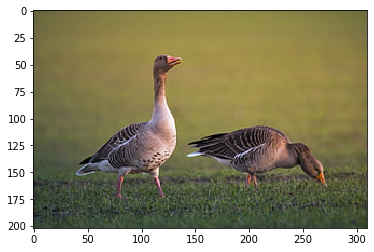

In [18]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
img = mpimg.imread('img/gray_goose.jpg')
print(type(img),img.shape)
imshow(img)
plt.show()

У нас трёхмерный массив, где третье измерение соответствует цветовой компоненте rgb. Цветную картинку можно преобразовать в двумерную серую (grayscale) с помощью формулы, которую я нашёл [тут](https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python) 

<class 'numpy.ndarray'> (202, 310)


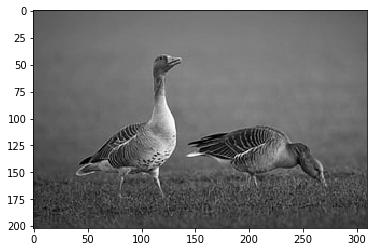

In [19]:
def rgb2gray(rgb):
    tile = np.tile(np.c_[0.333, 0.333, 0.333], reps=(rgb.shape[0],rgb.shape[1],1))
    return np.sum(tile * rgb, axis=2)

img_gray = rgb2gray(img)
print(type(img_gray), img_gray.shape)
imshow(img_gray, cmap = "gray")
plt.show()

Далее 

* обучите на массиве *img_gray* размерности $202 \times 310$ класс TruncatedSVD c параметром n_components=5
* получите матрицу *img_gray_svd* с помощью функции `transform`
* получите массив *img_gray_svd_restored* с помощью функции `inverse_transform`
* визуализируйте массив *img_gray_svd_restored* с помощью функции *imshow*

Этот алгоритм демонстрирует, как происходит сжатие данных большой размерности. А результате у вас должен получиться гусь как бы в очень нечётком виде


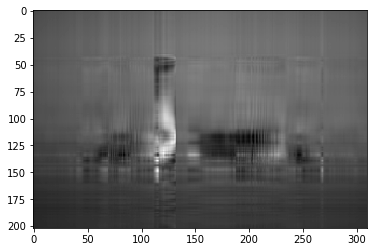

In [20]:
# -- ВАШ КОД ТУТ --
from sklearn.decomposition import TruncatedSVD

tr_svd = TruncatedSVD(n_components=5)
img_gray_svd = tr_svd.fit_transform(img_gray)
img_gray_svd_restored = tr_svd.inverse_transform(img_gray_svd)

imshow(img_gray_svd_restored, cmap="gray")
plt.show()

# -----------------

**Домашнее задание на применение t-sne**

Алгоритм выполнения домашней работы:

* выполните PCA преобразование матрицы $X$, передайте новую матрицу в `eval_model`. Какое значение Accuracy получили?
* выполните t-sne преобразование матрицы $X$, передайте новую матрицу в `eval_model`. Какое значение Accuracy получили?

Какие выводы можно сделать?

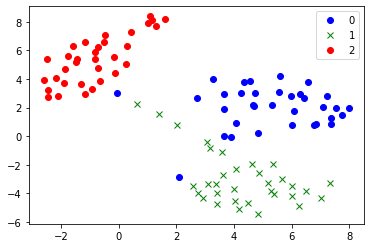

In [28]:
from sklearn.manifold import TSNE

tsne_transformer = TSNE(n_components=2)

x_tsne = tsne_transformer.fit_transform(X)

colors = ['bo', 'gx', 'ro']
# И нарисуем получившиеся точки в нашем новом пространстве
for name, label, color in [('class_%d' % i, i, colors[i]) for i in range(num_labels)]:
    plt.plot(x_tsne[y == label, 0], x_tsne[y == label, 1], color, label=label)
plt.legend(loc=0);

Код для вычисления качества моделей

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

def eval_model(input_x, input_y):
    """Обучаем и валидируем модель"""
    X_train, X_test, y_train, y_test = train_test_split(
        input_x, input_y, test_size=.3, stratify=y, random_state=42
    )
    # Для примера возьмём неглубокое дерево решений
    clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict_proba(X_test)
    acc_score = accuracy_score(y_test, preds.argmax(axis=1))
    print('Accuracy: %.5f' % acc_score)
    
df_source = pd.read_csv('data/client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

In [32]:
PCA_X = PCA(n_components=2).fit_transform(X)
TSNE_X = TSNE(n_components=2).fit_transform(X)
eval_model(PCA_X, y)
eval_model(TSNE_X, y)

Accuracy: 0.83333
Accuracy: 0.90000
